# Hyun-Joon Yang
# BISC 478
# yanghyun@usc.edu
# HW 5

<hr>

In [1]:
library('IRdisplay')

<hr>

# Q1
<br>

<strong>
    For this problem we are going to explore the GWAS Catalog. <br>
    Go to: https://www.ebi.ac.uk/gwas/ <br>
    In the search window type, “type i diabetes mellitus”. Click on the first result (it might take a minute to update).
</strong>

## a. (1 pt) How many associations?

351

## b. (1 pt) How many studies?

56

#### In Associations, click on the up arrow next to “P-value”.

## c. (1 pt) What is the p-value of the variant with the smallest p-value?

variant: rs1770-G

p-value: $2 \times 10^{-232}$

## d. (1 pt) What is the risk allele frequency (RAF) of this variant?

0.46

## e. (1 pt) What is the odds ratio (OR) of this variant?

4.28

## f. (1 pt) Which chromosome is this variant on?

chromosome 6

#### Click on the “study accession” value for this variant.

## g. (1 pt) How many cases and controls and what population was used for the GWAS study that identified this variant?

cases: 1,005 <br>
controls: 1,257 <br>
population: Han Chinese ancestry

#### Click on the web browser back arrow. Back in Associations, click on the down arrow next to odds ratio.

## h. (1 pt) What is the p-value of the variant with the largest odds ratio?

variant: rs191449639-A <br>
p-value: $1 \times 10^{-8}$

## i. (1 pt) What is the risk allele frequency (RAF) of this variant?

0.005

## j. (1 pt) What is the odds ratio (OR) of this variant?

32.42

## k. (1 pt) Which chromosome is this variant on?

chromosome 4

#### Click on the “study accession” value for this variant.

## l. (1 pt) How many cases and controls and what population was used for the GWAS study that identified this variant?

cases: 4,948 <br>
control: 12,076 <br>
population: European ancestry

## m. (3 pts) Are you surprised that the variant with the smallest p-value is not the variant with the largest odds ratio? Discuss.

No, due to factors like linkage disequilibrium, smallest p-value does not mean the variant is causal or has largest odds ratio. Fine mapping is needed to further investigate the variants.

<hr>

# Q2
<br>

<strong>
    For the next two problems we are going to use the R code in GWAS lecture 4
(lecture notes on Blackboard, you can just copy and past the commands and then
change the numbers for the matrix 𝑚 and the inflation factor 𝜆). If you do not
have R already installed on your computer, use the website mentioned in lecture:
https://rdrr.io/snippets/
</strong>
<br>
<br>
<strong>
    For each of the two tables below compute the p-value for the chi-squared test, the
p-value for the Cochran-Armitage trend test (with genomic control inflation factor
𝜆 = 1, so no adjustment), the odds ratio, and the 95% confidence interval for the
odds ratio.
</strong>

In [2]:
trend.test <- function(m, lambda) {
    # verify dimension
    stopifnot(identical(dim(m), as.integer(c(2,3))))
    # calculate Y2
    N = sum(m); R = sum(m[1,])
    r1 = m[1,2]; r2 = m[1,3]
    n1 = sum(m[,2]); n2 = sum(m[,3])
    num = N*(N*r1+N*2*r2-R*n1-R*2*n2)^2
    den = (N-R)*R*(N*n1+N*4*n2-(n1+2*n2)^2)
    Y2 = (num/den)
    # calculate p-value
    pval <- 1-pchisq(Y2/lambda,df=1)
    return(c(Y2, pval))
}

In [3]:
odds.ratio <- function(m) {
    # verify dimension
    stopifnot(identical(dim(m), as.integer(c(2,3))))
    # calculate odds ratio
    mall = matrix(nrow=2,ncol=2)
    mall[1,] = c(2*m[1,1]+m[1,2],m[1,2]+2*m[1,3])
    mall[2,] = c(2*m[2,1]+m[2,2],m[2,2]+2*m[2,3])
    oddsratio = (mall[1,2]/mall[2,2])/(mall[1,1]/mall[2,1])
    # calculate confidence interval
    s = sqrt(1/mall[1,1]+1/mall[1,2]+1/mall[2,1]+1/mall[2,2])
    conf = oddsratio*c(exp(-2*s),exp(2*s)) # 95% conf int
    return(c(oddsratio, conf))
}

In [4]:
rownames <- c('Cases', 'Controls')

In [5]:
# data <- c(150, 375, 250, 500, 940, 460)
# m <- m <- matrix(data=data, nrow=2, ncol=3, byrow=T)
# print(chisq.test(x=m, correct=F))
# print(trend.test(m=m, lambda=1.1))
# print(odds.ratio(m=m))

## a. (5 pts)

In [6]:
colnames <- c('AA', 'AC', 'CC')
dimnames <- list(rownames, colnames)
data <- c(400, 500, 100, 540, 400, 60)
m <- matrix(data=data, nrow=2, ncol=3, dimnames=dimnames, byrow=T)
m

,AA,AC,CC
Cases,400,500,100
Controls,540,400,60


#### Chi-Squared Test

In [7]:
chisq.test(m, correct=F)


	Pearson's Chi-squared test

data:  m
X-squared = 41.962, df = 2, p-value = 7.727e-10


$ p = 7.727 \times 10^{-10}$

#### Cochran-Armitage Trend Test

In [8]:
trend.test(m, 1)

[1] 4.071375e+01 1.762429e-10

$ p = 1.762 \times 10^{-10} $

#### Odds Ratio & Confidence Interval

In [9]:
odds.ratio(m)

[1] 1.532544 1.334311 1.760229

Odds ratio = $1.533$

Confidence Interval = $[1.334, 1.760]$

## b. (5 pts)

In [10]:
colnames <- c('TT', 'TG', 'GG')
dimnames <- list(rownames, colnames)
data <- c(95, 800, 105, 260, 490, 250)
m <- matrix(data=data, nrow=2, ncol=3, dimnames=dimnames, byrow=T)
m

,TT,TG,GG
Cases,95,800,105
Controls,260,490,250


#### Chi-Squared Test

In [11]:
chisq.test(m, correct=F)


	Pearson's Chi-squared test

data:  m
X-squared = 210.41, df = 2, p-value < 2.2e-16


$ p < 2.2 \times 10^{-16}$

#### Cochran-Armitage Trend Test

In [12]:
trend.test(m, 1)

[1] 0.5633803 0.4529015

$ p = 0.453 $

#### Odds Ratio & Confidence Interval

In [13]:
odds.ratio(m)

[1] 1.0408122 0.9171391 1.1811621

Odds ratio = $1.041$

Confidence Interval = $[0.917, 1.181]$

## c. (5 pts) Why do the two p-values roughly agree for (a) but radically disagree for (b)? Discuss.

One possible reason for the observed difference could be that in (a), the genetic model is additive whereas in (b), it is not, as Cochran-Armitage trend test sacrifices ability to detect non-additive trends for higher power.

<hr>

# Q3
<br>

<strong>
    For the data in (2a), compute the p-value for the Cochran-Armitage trend test for
the following genomic control inflation factors:
</strong>

In [14]:
colnames <- c('AA', 'AC', 'CC')
dimnames <- list(rownames, colnames)
data <- c(400, 500, 100, 540, 400, 60)
m <- matrix(data=data, nrow=2, ncol=3, dimnames=dimnames, byrow=T)
m

,AA,AC,CC
Cases,400,500,100
Controls,540,400,60


In [15]:
lambdas = c(1, 1.05, 1.10, 1.15)
for (lambda in lambdas) {
    pval = trend.test(m, lambda)[2]
    print(paste('lambda:', lambda, '   ', 'p-value:', pval))
}

[1] "lambda: 1     p-value: 1.76242909155633e-10"
[1] "lambda: 1.05     p-value: 4.75580685943555e-10"
[1] "lambda: 1.1     p-value: 1.1737452121352e-09"
[1] "lambda: 1.15     p-value: 2.68038102824164e-09"


## a. 1 pt 𝜆 = 1 (no adjustment)

$p=1.762 \times 10^{-10}$

## b. 1 pt 𝜆 = 1.05

$ p = 4.756 \times 10^{-10}$

## c. 1 pt 𝜆 = 1.10

$ p = 1.174 \times 10^{-9}$

## d. 1 pt 𝜆 = 1.15

$ p = 2.680 \times 10^{-9}$

## e. 1 pt As 𝜆 increases, do p-values increase or decrease?

As $\lambda$ increases, p-values increase

<hr>

# Q4
<br>

<strong>
    (5 pts) In your own words, explain one possible reason for the missing
heritability in many GWAS studies.
</strong>

One possible reason for missing heritability in GWAS studies is genetic variations other than SNPs. Indels, sequence repeats, and large scale genomic rearrangements are genetic variations not accounted for by SNP chips. Although whole genome sequencing has potential to account for these other genetic variations, it requires high quality and high coverage.

<hr>

# Q5
<br>

<strong>
    A researcher is interested in studying differential expression (DE) genes in three
tissues (Tissue1, Tissue2, and Tissue3) and generated four different RNA-seq
datasets (Dataset 1-4). Before carrying out the differential expression analysis,
PCA analysis was performed using normalized counts. The plot based on the first
two PCs is shown below.
</strong>

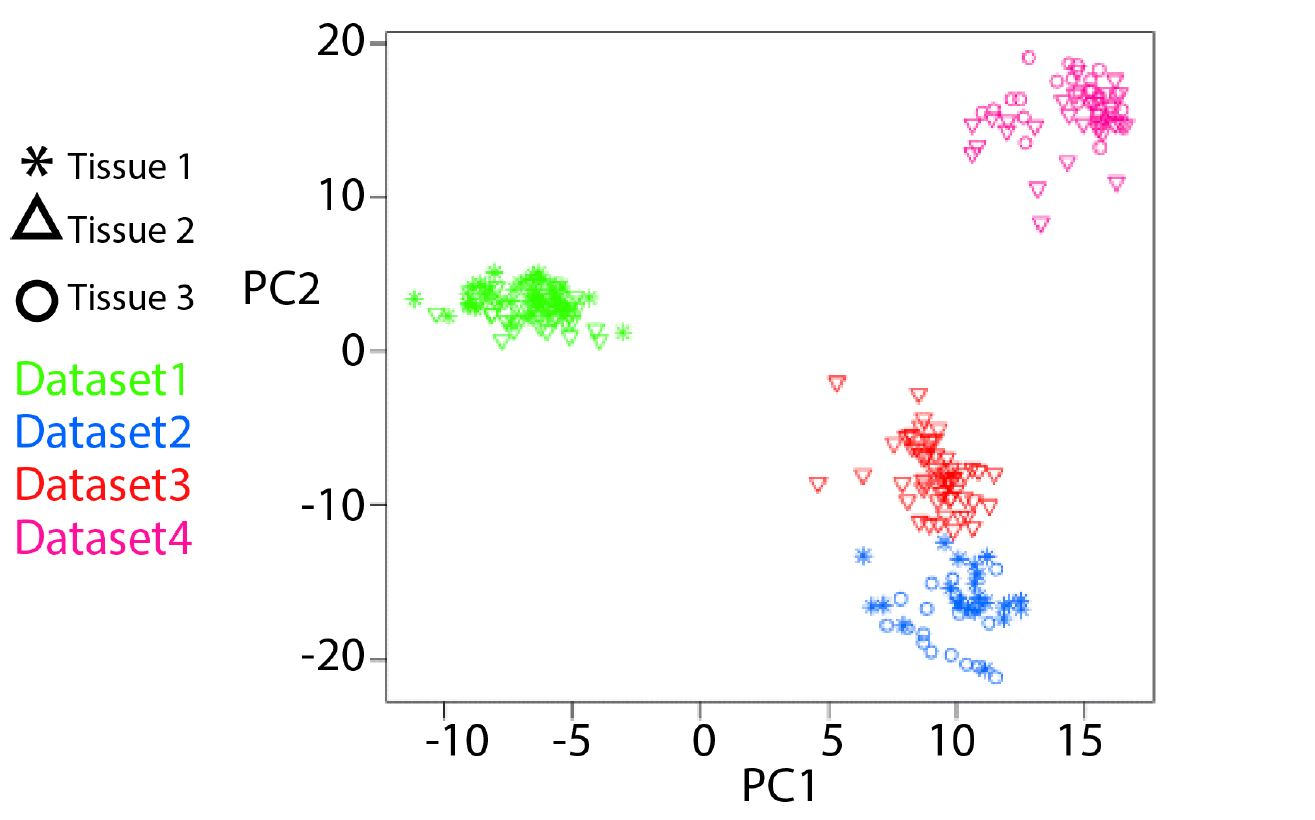

In [16]:
display_png(file='img5-1.jpg')

#### Answer the following questions based on the PCA plot

## a. (1 pt) Which component (PC1/PC2) has better separation of Dataset4 from Dataset2?

PC2

## b. (2 pts) The differences between different tissues are more pronounced than the differences between different types of datasets (True/False). Explain.

False. The data is clustered by dataset and within a cluster you can see that there are different types of tissues present.

## c. (2 pts) If the researcher carries out DE analysis between tissue types using the normalized counts used for generating the PCA plots as it is (without any additional correction), meaningful results cannot be obtained (True/False). Explain.

True. Because there is more variation between the datasets than tissue types, it would be difficult to determine whether the differential expression is due to tissue type (what we want to study) or due to dataset.

<hr>

# Q6
<br>

<strong>
    Go to the UCSC genome browser (http://genome.ucsc.edu) and select the Human
hg38 genome assembly. In the search box, type the gene name “HBB” and select
“HBB” gene. Use the GENCODE gene track to answer the following questions:
</strong>

## a. (1 pt) Enable dbSNP 153 track under Variation. Using dbSNP153 track, find how many SNPs are reported in the gene body of this gene?

7

## b. (1 pt) How many SNPs are in exon 1? What are the ids of SNPs present in exon 1?

* 2 SNPs
* rs334, rs713040

#### Enable the ”OMIM Alleles” track under ”Phenotypes and Literature”. OMIM can be used to find information about disease phenotypes associated with this gene. Make sure to refresh after enabling the track. Change OMIM Alleles to pack. Click on OMIM Allelic Variant 141900.0401. It will take you to another page.

## c. (1 pt) What is the amino acid substitution for this variant?

VAL54ASP (substitution of aspartic acid for valine at position 54 of the beta chain)

## d. (1 pt) Is this a synonymous SNP or non-synonymous SNP?

non-synonymous SNP

## e. (1 pt) What two medical conditions are reported in the literature for the patient with this variant? Find the information in the 141900.0401 link.

splenomegaly and anemia